In [49]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerías

In [50]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

## 2. Leyendo los datos

In [51]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [52]:
X = dataset.drop(columns=['Exited'], axis=1)
y = dataset['Exited']

## 4. Realizando el escalamiento robusto de las variables predictoras

In [53]:
esc_rob = RobustScaler()
X_esc = esc_rob.fit_transform(X=X)

## 5. Separando los datos en train y test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Bosques aleatorios

#### 6.1. Creando el algoritmo y entrenandolo

In [55]:
bosque = RandomForestClassifier(n_estimators=100)
bosque.fit(X=X_train, y=y_train)

RandomForestClassifier()

#### 6.2. Evaluando las predicciones del modelo con los datos de entrenamiento

Presición del modelo: 100.00 %


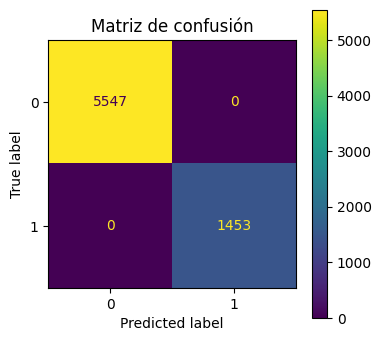

In [56]:
y_pred = bosque.predict(X=X_train)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 6.3. Evaluando las predicciones del modelo con los datos de test

Presición del modelo: 87.03 %


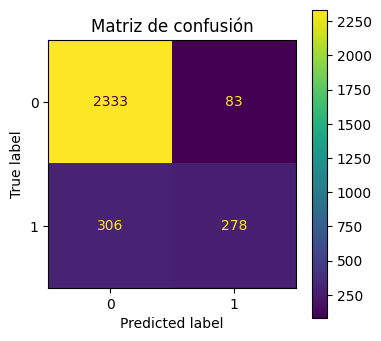

In [57]:
y_pred = bosque.predict(X=X_test)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

## 7. Optimización paramétrica de forma aleatoria

In [58]:
#Creando la grilla de parámetros
parametros = {
    'n_estimators' : range(1,101),
    'criterion' : ['gini','entropy','log_loss'],
    'max_features': ['sqrt','log2','int','float']
}

#Se crea el optimizador
rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=parametros,
    n_iter=20,
    cv=5,
    scoring='accuracy'
)

#Entrenando el modelo por optimización paramétrica
rand_search.fit(X=X_train, y=y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', 'int',
                                                         'float'],
                                        'n_estimators': range(1, 101)},
                   scoring='accuracy')

#### 7.1. Evaluando las predicciones del nuevo modelo con los datos de entrenamiento

Presición del modelo: 100.00 %


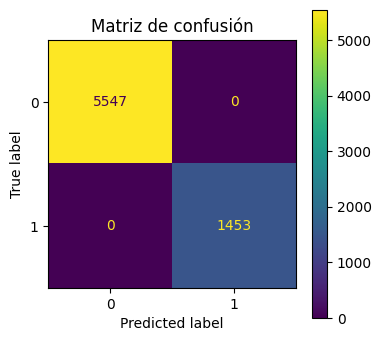

In [59]:
y_pred = rand_search.predict(X=X_train)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 7.2. Evaluando las predicciones del nuevo modelo con los datos de prueba

Presición del modelo: 86.80 %


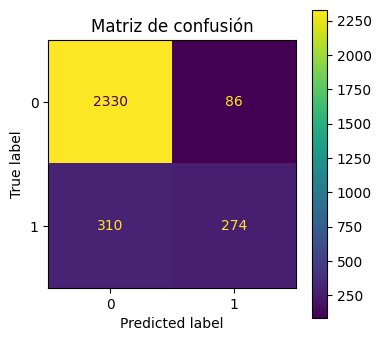

In [60]:
y_pred = rand_search.predict(X=X_test)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()